<h2>Neural Networks</h2>

<h3>Cardiovascular diseases</h3>

The first dataset that we are going to use is from https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset. Data is from the year 1988 from hospitals in Clevelant, Hungary, Switzerland and Long Beach V and are from patients that had been tested for potential cardiovascular diseases. We have information from 13 characteristics related to the patient's health and our goal is to try to predict whether a patinet is likely to suffer a cardiovascular disease or not.

**Exercise 1**

Read the dataset using pandas and show the first lines of data in the notebook

In [ ]:
import pandas as pd

# your code goes here

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<h5> Exercise 2 </h5>

Some dataset entries contain NaNs. Use pandas `.dropna` method to remove them. Then select the column 'target' and store it in a variable called `y` and the rest of the columns in a variable called `X`.

In [ ]:
# your code goes here

<h5>Exercise 3<H5>

Use Sklearn's *train_test_split* function to split the dataset in train and test. The test set must be 20% of the total data. Save the inputs and labels in variables called `X_train`, `y_train`, `X_test` and `y_test`. Use the argument *stratify* to ensure that the ratio of positive (1) and negative(0) classes is equal in the train and test sets. Use `StandardScaler` from Sklearn to standardize the inputs with the training mean and standard deviation. You can do this by calling the `.fit_transform` method with the training set and just the `.transform` method with the test set. You can find the documentation in the following links:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# your code goes here

<h4>PyTorch </h4>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.utils.data import DataLoader

To use PyTorch we need to transform the numpy arrays into torch tensors. We will also convert the labels into 2 dimensional tensors where the target 0 will become the tensor [1, 0] and the target 1 will become the tensor [0, 1]. Remember that each element in the train_set and test_set lists must be a tuple with two elements where the first element is the data tensor and the second one is the label tensor.

In [ ]:
train_set, test_set = [], []
for X, y in zip(X_train, y_train):
    y_vector = torch.zeros(2)
    y_vector[int(y)] = 1
    train_set.append((torch.tensor(X, dtype=torch.float32), y_vector))
for X, y in zip(X_test, y_test):
    y_vector = torch.zeros(2)
    y_vector[int(y)] = 1
    test_set.append((torch.tensor(X, dtype=torch.float32), y_vector))

Exercise 4

Define the DataLoader for the train and test sets. Use a batch size of 16 for the train loader with `shuffle=True` and a batch size of 1 for the test loader with `shuffle=False`. Name the dataloader variables `train_loader` and `test_loader`. We will ignore PyTorch's Dataset class for now.

In [ ]:
# your code goes here

<h5> Exercici 5 </h5>

Now we need to design the neural network. We will create a network with two *fully connected* layers: the first one receives 13 input features and has 16 *hidden neurons*, and the second one receives 16 input features and has 2 output neurons, one for each label that we want to predict. In the first layer we will use ReLU as the activation function and in the second one we will use softmax. The code to define each of the activation layers/functions is as follows:

*   `nn.Linear(n_inputs, n_outputs)` -> Fully connected layer with *n_inputs* input neurons and *n_outputs* output neurons. Store it as the following attribute: `self.linear = nn.Linear(n_inputs, n_outputs)` (remember that you should have `self.linear_1` and `self.linear_2` in the constructor).
*   `F.relu(x)` -> Applies the ReLU function ($max(0,x_i)$) to the input tensor. It returns a tensor with the same shape as the input such that if the input is a tensor with values [-2, -1, 0, 1, 2] the output is the tensor [0, 0, 0, 1, 2].
*   `F.softmax(x, dim=1)` -> It applies the softmax function to the input tensor along dimension 1, such that the sum of the output of all neurons is 1. As in the previous case, the shape of the output is the same as the shape of the input tensor.
*   We will apply the activation functions directly to the outputs of each layer. In the forward function, start with the input tensor `x` and apply the transformations until you reach the output in the following way:

    ```x = self.linear(x)```

    ```x = F.relu(x)```

    ```...```

Finally `return x`



In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # your code goes here
        pass

    def forward(self, x):
        # your code goes here
        return x

To utilize the GPU in PyTorch we use the `.to()` method. It accepts as argument a string that can either be `'cuda'` (GPU) or `'cpu'`. Here we check if a GPU is available, otherwise we use the CPU. For this particular model and dataset which are relatively small it is viable to use the CPU, but it is generally recommended to use the GPU for training when possible.

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = NeuralNetwork().to(device)

Without executing the following cell, can you calculate the number of trainable parameters in your model? Check if your answer is correct:

In [ ]:
print(sum(p.numel() for p in model.parameters()))

258


As loss function we will use the cross entropy, suitable for the current classification problem. As optimizer we will use the Adam with learning rate 5e-4.

https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=5e-4)

Finally we define the training loop. We will train the model for 50 epochs and we will store the training loss, test loss and test accuracy per epoch in three separate lists.

In [ ]:
epochs = 50
n_samples_train = len(train_loader)
n_samples_test = len(test_loader)
training_loss_per_epoch, test_loss_per_epoch, test_accuracy_per_epoch = [], [], []
for epoch in range(epochs):
    training_loss = 0
    for data, labels in train_loader:
        predict = model(data.to(device))
        loss = loss_function(labels.to(device), predict)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        training_loss += (loss.item() / n_samples_train)
    test_loss, correct, total = (0, 0, 0)
    for data, label in test_loader:
        predict = model(data.to(device))
        loss = loss_function(label.to(device), predict)
        test_loss += (loss.item() / n_samples_test)
        if torch.argmax(predict) == torch.argmax(label):
            correct += 1
        total += 1
    accuracy = correct/total*100
    training_loss_per_epoch.append(training_loss)
    test_loss_per_epoch.append(test_loss)
    test_accuracy_per_epoch.append(accuracy)
    print('training loss: {:.3f}, test loss: {:.3f}, test accuracy: {:.2f}%'.format(training_loss, test_loss, accuracy))

training loss: 0.797, test loss: 0.781, test accuracy: 72.37%
training loss: 0.765, test loss: 0.748, test accuracy: 79.77%
training loss: 0.728, test loss: 0.708, test accuracy: 79.77%
training loss: 0.684, test loss: 0.667, test accuracy: 81.71%
training loss: 0.643, test loss: 0.631, test accuracy: 80.93%
training loss: 0.607, test loss: 0.601, test accuracy: 81.71%
training loss: 0.579, test loss: 0.579, test accuracy: 82.10%
training loss: 0.557, test loss: 0.562, test accuracy: 81.32%
training loss: 0.541, test loss: 0.550, test accuracy: 81.32%
training loss: 0.529, test loss: 0.541, test accuracy: 81.71%
training loss: 0.519, test loss: 0.533, test accuracy: 82.10%
training loss: 0.510, test loss: 0.527, test accuracy: 82.10%
training loss: 0.503, test loss: 0.522, test accuracy: 82.10%
training loss: 0.497, test loss: 0.518, test accuracy: 82.49%
training loss: 0.492, test loss: 0.514, test accuracy: 83.27%
training loss: 0.487, test loss: 0.510, test accuracy: 83.27%
training

What is the accuracy in the test set?

<h5> Exercici 6 </h5>

Create a plot with two subplots using the following code:

```fig, ax = plt.subplots(1,2,figsize=(12,5))```

In the first subplot, plot the training and test curves per epoch, label them 'train' and 'test' and show the legend. Plot the accuracy per epoch in the second subplot in green. Name the y_label `Loss` in the first subplot, `Accuracy %` in the second subplot and the x_label `Epoch` in both subplots using a font size of 16.

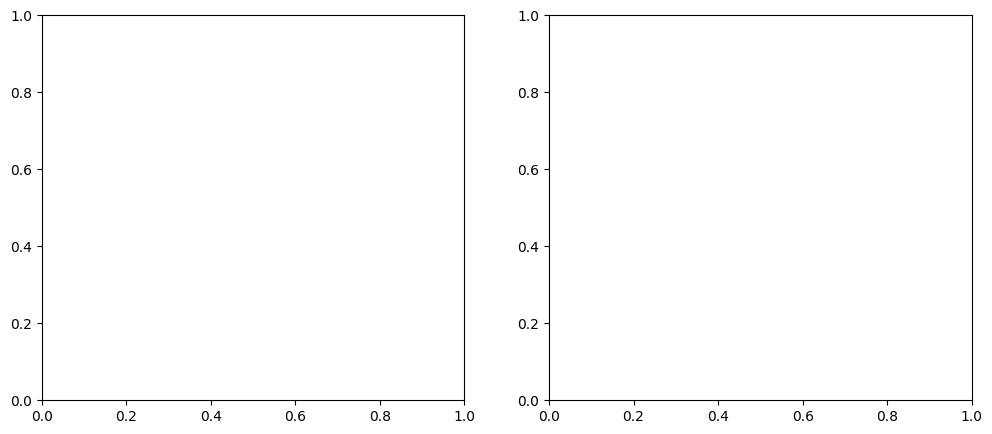

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(12, 5))
# your code goes here


<h3>Breast Cancer</h3>

This dataset is downloaded from https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data. It contains characteristics about breast tumors and the label that tells whether they are benign or malignant.

Exercici 7

Load the data from the file breast-cancer.csv and repeat the steps from exercises 1-4 in the previous example. In this case the target is a categorical variable with values 'B' for benign and 'M' for malignant. As in the previous case, convert the labels to tensors where [1, 0] represents a benign tumor and [0,1] represents a malignant tumor.

Exercise 8

Define your own neural network model. Remember that it must have two neurons in the output layer. Use CrosEntropyLoss as the loss function and Adam as the optimizer. Use the learning rate and number of epochs of your choice. How many parameters does your model have? Can you obtain more than 95% accuracy in the test set?